In [24]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Optimizing Learning

## Load Data

In [30]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Standardize

In [37]:
from implementations import *
def normalize(x: np.ndarray):
    """
    function that normalizes each columns of the matrix x to have unit length.

    Args:
     ``x``: A numpy matrix of shape (n, m)

    Returns:
     ``x``: The normalized (by row) numpy matrix.
    """
    return x/np.linalg.norm(x, ord=2, axis=0, keepdims=True)

In [39]:
y_norm = normalize(y)
tX_norm = normalize(tX)

## Find the best number of dimension

In [40]:
def build_poly(tx,degree):
    D = len(tx[0,:])
    N = len(tx[:,0])
    new_x = np.ones((N,1)) #add bias
    if degree>=1:
        for i in range(1,degree+1):
            new_x = np.append(new_x,tx**i,axis=1) 
    return new_x

def split_data_no_shuffle(y,tX,ratio):
    #seed = 1
    #np.random.seed(seed)
    #c = list(zip(tX,y))
    #np.random.shuffle(c)
    #x_new, y_new = zip(*c)
    N = len(y)
    limit = int(round(ratio*N))
    x_train, x_test = tX[:limit], tX[limit:]
    y_train, y_test = y[:limit], y[limit:]
       
    return x_train,y_train,x_test,y_test

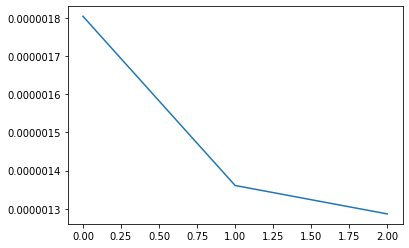

In [48]:
ratio = 0.6
losses = []
degrees = [0,1,2]
for degree in degrees:
    tX_new = build_poly(tX_norm,degree)
    x_train,y_train,x_test,y_test = split_data_no_shuffle(y_norm,tX_new,ratio)
    w_LS, loss_LS = least_squares(y_train,x_train)
    losses = np.append(losses,compute_mse(y_test,x_test,w_LS))
plt.plot(degrees,losses)